In [1]:
import glob
import os
from datetime import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
DATASET_COLUMNS  = ["timestamp", "date", "activity"]
path=r'dataset/depression/data/condition'
all_file=glob.glob(os.path.join(path+"/*.csv") )
li=[]
for filename in all_file:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='latin-1',names=DATASET_COLUMNS)
    df['label']=0
    li.append(df)
frame_condition=pd.concat(li,axis=0,ignore_index=True)

In [3]:
frame_condition

,timestamp,date,activity,label
0,2003-05-07 12:00:00,2003-05-07,0,0
1,2003-05-07 12:01:00,2003-05-07,143,0
2,2003-05-07 12:02:00,2003-05-07,0,0
3,2003-05-07 12:03:00,2003-05-07,20,0
4,2003-05-07 12:04:00,2003-05-07,166,0
...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,0,0
551712,2004-06-10 15:04:00,2004-06-10,0,0
551713,2004-06-10 15:05:00,2004-06-10,449,0
551714,2004-06-10 15:06:00,2004-06-10,0,0


In [4]:
DATASET_COLUMNS  = ["timestamp", "date", "activity"]
path=r'dataset/depression/data/control'
all_file=glob.glob(os.path.join(path+"/*.csv") )
li=[]
for filename in all_file:
    df=pd.read_csv(filename,index_col=None,header=0,encoding='latin-1',names=DATASET_COLUMNS)
    df['label']=1
    li.append(df)
frame_control=pd.concat(li,axis=0,ignore_index=True)

In [5]:
frame_control

,timestamp,date,activity,label
0,2003-03-18 15:00:00,2003-03-18,60,1
1,2003-03-18 15:01:00,2003-03-18,0,1
2,2003-03-18 15:02:00,2003-03-18,264,1
3,2003-03-18 15:03:00,2003-03-18,662,1
4,2003-03-18 15:04:00,2003-03-18,293,1
...,...,...,...,...
1019985,2003-12-01 12:53:00,2003-12-01,7,1
1019986,2003-12-01 12:54:00,2003-12-01,7,1
1019987,2003-12-01 12:55:00,2003-12-01,5,1
1019988,2003-12-01 12:56:00,2003-12-01,5,1


In [6]:
frame_condition['timestamp']=pd.DatetimeIndex(frame_condition['timestamp']).hour

In [7]:
frame_condition

,timestamp,date,activity,label
0,12,2003-05-07,0,0
1,12,2003-05-07,143,0
2,12,2003-05-07,0,0
3,12,2003-05-07,20,0
4,12,2003-05-07,166,0
...,...,...,...,...
551711,15,2004-06-10,0,0
551712,15,2004-06-10,0,0
551713,15,2004-06-10,449,0
551714,15,2004-06-10,0,0


In [8]:
frame_control['timestamp']=pd.DatetimeIndex(frame_control['timestamp']).hour

In [9]:
frame_control

,timestamp,date,activity,label
0,15,2003-03-18,60,1
1,15,2003-03-18,0,1
2,15,2003-03-18,264,1
3,15,2003-03-18,662,1
4,15,2003-03-18,293,1
...,...,...,...,...
1019985,12,2003-12-01,7,1
1019986,12,2003-12-01,7,1
1019987,12,2003-12-01,5,1
1019988,12,2003-12-01,5,1


In [10]:
frame=frame_condition.append(frame_control)

C:\Users\Duc\AppData\Local\Temp\ipykernel_13384\1077105967.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame=frame_condition.append(frame_control)


In [11]:
frame

,timestamp,date,activity,label
0,12,2003-05-07,0,0
1,12,2003-05-07,143,0
2,12,2003-05-07,0,0
3,12,2003-05-07,20,0
4,12,2003-05-07,166,0
...,...,...,...,...
1019985,12,2003-12-01,7,1
1019986,12,2003-12-01,7,1
1019987,12,2003-12-01,5,1
1019988,12,2003-12-01,5,1


In [34]:
df=frame[['timestamp','activity','label']]

In [55]:
df

,timestamp,activity,label
0,12,0,0
1,12,143,0
2,12,0,0
3,12,20,0
4,12,166,0
...,...,...,...
1019985,12,7,1
1019986,12,7,1
1019987,12,5,1
1019988,12,5,1


In [36]:
time,activity, label = list(df['timestamp']), list(df['activity']),list(df['label'])

In [37]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_bayes = GaussianNB()
model_tree = DecisionTreeClassifier()
model_regress = LogisticRegression()

In [57]:
x=df[df.columns[:-1]]
y=df['label']


In [103]:
accs=[]
models=[]
x_train, x_test, y_train, y_test = train_test_split(np.array(x).reshape(np.array(x).shape[0],-1), np.array(y), test_size=0.25, random_state=5000)
model_knn.fit(x_train,y_train)
model_tree.fit(x_train,y_train)
model_regress.fit(x_train,y_train)
model_bayes.fit(x_train,y_train)
accs.append(model_knn.score(x_test, y_test))
accs.append(model_bayes.score(x_test, y_test))
accs.append(model_tree.score(x_test, y_test))
accs.append(model_regress.score(x_test, y_test))
models.append('KNN 8-2')
models.append('Bayes 8-2')
models.append('Tree 8-2')
models.append('Regression 8-2')

In [98]:
print("Accurency KNN: {}".format(model_knn.score(x_test, y_test)))
print("Accurency Bayes: {}".format(model_bayes.score(x_test, y_test)))
print("Accurency Tree: {}".format(model_tree.score(x_test, y_test)))
print("Accurency Regression: {}".format(model_regress.score(x_test, y_test)))

Accurency KNN: 0.6095254334774652
Accurency Bayes: 0.6480567637245596
Accurency Tree: 0.6627923252919754
Accurency Regression: 0.6480567637245596


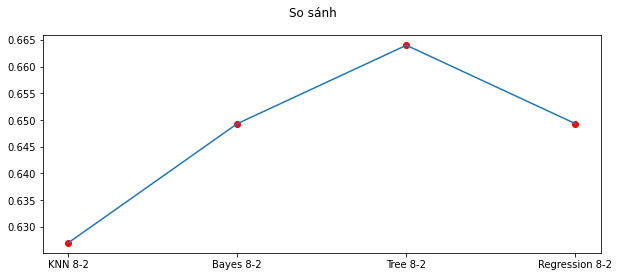

In [104]:
plt.figure(1,figsize=(10,4))
plt.plot(models,accs)
plt.scatter(models,accs,color = 'r')
plt.suptitle('So sánh')
plt.show()

In [95]:
num=np.array([9,100])

In [96]:
kq=model_knn.predict(num.reshape(1,2))
# kq=kq.reshape(np.array(kq).reshape(np.array(kq).shape[0],-1)).astype(np.int64)
print(kq[0])

print(kq.any())
print(kq.all())
if kq==0:
    print('Day la khung gio nguoi binh thuong hoat dong')
else:
    print('Day la khung gio nguoi khong binh thuong hoat dong')

0
False
False
Day la khung gio nguoi binh thuong hoat dong


In [1]:
import pickle
filename1 = 'model_knn_time.pkl'
filename3 = 'model_bayes_time.pkl'
filename4 = 'model_tree_time.pkl'
filename5 = 'model_regress_time.pkl'

#Save model
pickle.dump(model_knn, open(filename1, 'wb'))
pickle.dump(model_bayes, open(filename3, 'wb'))
pickle.dump(model_tree, open(filename4, 'wb'))
pickle.dump(model_regress, open(filename5, 'wb'))


NameError: name 'model_knn' is not defined

In [ ]:
model_KNN_time = pickle.load(open("model_knn_time.pickle", 'rb'))
model_BNB_time = pickle.load(open("model_bayes_time.pickle", 'rb'))
model_LR_time = pickle.load(open("model_regress_time.pickle", 'rb'))
model_RF_time = pickle.load(open("model_RF_time.pickle", 'rb'))